# Support Vector Machine

In [1]:
import some_load_train_evaluate_functions as ml

from sklearn.svm import LinearSVC

In [2]:
path = '../KG/db.env'

driver = ml.connect_to_neo4j(path)

Connected to database successfully.


### Load Data

In [3]:
# Diabetes data

diabetes_df = ml.get_data_of_disease(driver, 'Diabetes')
diabetes_df

,Respondent_ID,Gender,Age,BMI,25-hydroxyvitamin D2 + D3 [nmol/L],A/G Ratio,Alpha-carotene [umol/L],Alpha-crypotoxanthin [umol/L],Alpha-tocopherol [umol/L],Basophils [%],...,Ferritin [ng/mL],Gamma Glutamyl Transferase [IU/L],Hemoglobin [g/dL],Insulin [pmol/L],LDL-Cholesterol(NIH2) [mmol/L],Lactate Dehydrogenase [IU/L],Transferrin Saturation [%],Transferrin receptor [nmol/L],Triglyceride [mmol/L],Diabetes
0,93703,0,2,17.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,93704,1,2,15.7,74.4,NaN,NaN,NaN,NaN,0.7,...,36.60,NaN,13.1,NaN,NaN,NaN,NaN,30.6,NaN,0
2,93705,0,66,31.7,89.9,1.517241,0.138,0.071,26.006,1.0,...,28.70,21.0,11.9,NaN,NaN,174.0,28.0,39.8,NaN,0
3,93706,1,18,21.5,53.8,1.629630,0.160,0.031,16.765,0.8,...,284.00,16.0,16.3,NaN,NaN,142.0,51.0,34.0,NaN,0
4,93707,1,13,18.1,58.2,1.857143,0.009,0.044,22.756,0.5,...,49.30,9.0,14.5,NaN,NaN,177.0,21.0,34.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8888,102952,0,70,20.0,82.7,1.846154,0.235,0.077,31.347,0.6,...,135.00,18.0,13.4,26.34,1.112,168.0,39.0,29.1,0.881,1
8889,102953,1,42,35.8,49.5,1.142857,0.106,0.080,21.873,0.6,...,120.00,28.0,15.5,NaN,NaN,136.0,20.0,28.6,NaN,0
8890,102954,0,41,26.1,50.5,1.500000,0.117,0.056,26.935,1.4,...,1.99,8.0,6.4,56.94,2.793,123.0,5.0,248.0,0.553,0
8891,102955,0,14,45.6,61.9,1.205882,0.031,0.079,17.856,0.9,...,11.40,16.0,11.4,NaN,NaN,158.0,5.0,57.7,NaN,0


### Training

In [4]:
svm_classifier = LinearSVC(random_state=42)

# Attributes and Labels

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

# Training

svm_classifier.fit(X_train, y_train)

# Accuracy scores

y_pred = svm_classifier.predict(X_val)

print('Training Accuracy: ',ml.accuracy_score(y_train, svm_classifier.predict(X_train)))

print('Testing Accuracy: ',ml.accuracy_score(y_val, y_pred))

Training Accuracy:  0.9367444475681754
Testing Accuracy:  0.9381501265111049


## Feature Selection

### Correlation Analysis

In [5]:
svm_classifier_test = LinearSVC(random_state=42)

In [6]:
pos_corr, neg_corr = ml.get_correlated_features(diabetes_df,'Diabetes',pos=0.1,neg=-0.1)

corr_features = ['Gender'] + list(pos_corr.keys()[1:10]) + list(neg_corr.keys()[:10])
corr_features

['Gender',
 'Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Age',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Insulin [pmol/L]',
 'Osmolality [mmol/Kg]',
 'Retinol [umol/L]',
 'Triglyceride [mmol/L]',
 'Total Lycopene [umol/L]',
 'Trans-lycopene [umol/L]',
 'Platelet count [1000 cells/uL]',
 'A/G Ratio',
 'Chloride [mmol/L]',
 'Platelet_WBC Ratio',
 'Direct HDL-Cholesterol [mmol/L]',
 'Albumin [g/dL]',
 'Alpha-crypotoxanthin [umol/L]',
 'Lymphocyte_C-Reactive Protein Ratio']

In [7]:
ml.evaluate_feature_set(corr_features, svm_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.933

Test Accuracy: 0.932

Precision: 0.895

Recall: 0.566

F1-Score: 0.694


### SelectFromModel

In [8]:
sfm_features = ml.select_from_model_features(svm_classifier_test,X,y)
sfm_features

['Age',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Fasting Glucose [mmol/L]',
 'Glycohemoglobin [%]',
 'Hematocrit [%]',
 'Iron frozen [umol/L]',
 'Lymphocyte [%]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Mean cell volume [fL]',
 'Non_HDL Ratio',
 'Osmolality [mmol/Kg]',
 'RBC count [million cells/uL]',
 'Retinol [umol/L]',
 'Segmented neutrophils [%]',
 'Sodium [mmol/L]',
 'Total Cholesterol [mmol/L]',
 'Total Iron Binding Capacity [umol/L]',
 'Triglyceride_HDL Ratio',
 'UIBC [umol/L]',
 'Vitamin C [umol/L]',
 'White blood cell count [1000 cells/uL]',
 'Hemoglobin [g/dL]',
 'Transferrin receptor [nmol/L]']

In [9]:
sfm_features = list(sfm_features)

ml.evaluate_feature_set(sfm_features, svm_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.935

Test Accuracy: 0.935

Precision: 0.904

Recall: 0.583

F1-Score: 0.709


### SelectKBest

In [10]:
k_best_features = ml.select_k_best(X, y, n=30)
k_best_features[:30]

['Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Age',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Osmolality [mmol/Kg]',
 'Retinol [umol/L]',
 'Lymphocyte [%]',
 'Insulin [pmol/L]',
 'Alpha-tocopherol [umol/L]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Segmented neutrophils [%]',
 'Neutrophil_Lymphocyte Ratio',
 'Alpha-crypotoxanthin [umol/L]',
 'Albumin [g/dL]',
 'Direct HDL-Cholesterol [mmol/L]',
 'Platelet_WBC Ratio',
 'C-Reactive Protein [mg/L]',
 'Creatinine [mg/dL]',
 'Ferritin [ng/mL]',
 'Chloride [mmol/L]',
 'Red cell distribution width [%]',
 'Triglyceride [mmol/L]',
 'A/G Ratio',
 'Platelet count [1000 cells/uL]',
 'Triglyceride_HDL Ratio',
 'Trans-lycopene [umol/L]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Total Lycopene [umol/L]',
 'Mean platelet volume [fL]']

In [11]:
ml.evaluate_feature_set(k_best_features[:30], svm_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.933

Test Accuracy: 0.934

Precision: 0.903

Recall: 0.579

F1-Score: 0.705


### Recursive Feature Elimination (RFE) 

In [12]:
rfe_features = ml.select_rfe_features(svm_classifier_test,X,y,n=30,step=0.5)
rfe_features[:30]

['Triglyceride [mmol/L]',
 'Glycohemoglobin [%]',
 'Hematocrit [%]',
 'Segmented neutrophils [%]',
 'Iron [ug/dL]',
 'Iron frozen [umol/L]',
 'UIBC [umol/L]',
 'Lymphocyte [%]',
 'Triglyceride_HDL Ratio',
 'Mean Cell Hgb Conc. [g/dL]',
 'Mean cell volume [fL]',
 'Monocyte [%]',
 'Non_HDL Ratio',
 'Osmolality [mmol/Kg]',
 'Transferrin receptor [nmol/L]',
 'Total Iron Binding Capacity [umol/L]',
 'Total Cholestrol_HDL Ratio',
 'Total Cholesterol [mmol/L]',
 'RBC count [million cells/uL]',
 'Retinol [umol/L]',
 'White blood cell count [1000 cells/uL]',
 'Fasting Glucose [mmol/L]',
 'Vitamin C [umol/L]',
 'Sodium [mmol/L]',
 'Age',
 'BMI',
 'Insulin [pmol/L]',
 'Hemoglobin [g/dL]',
 'Eosinophils [%]',
 'Blood Urea Nitrogen [mg/dL]']

In [13]:
ml.evaluate_feature_set(rfe_features[:30], svm_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.935

Test Accuracy: 0.935

Precision: 0.907

Recall: 0.583

F1-Score: 0.709


### Lasso Regularization

In [14]:
# Uses lasso regularization in the LinearSVC model to give more weights to more important features

def svc_lasso_select(X_train, y_train, C=1):

    svc = LinearSVC(penalty='l1', C=C, dual=False, random_state=42)
    svc.fit(X_train, y_train)

    # Get feature importance coefficients from the SVM model
    feature_importance = svc.coef_[0]

    feature_importance_pairs = [(feature, importance) for feature, importance in zip(X.columns, feature_importance)]
    feature_importance_pairs.sort(key=lambda x: abs(x[1]), reverse=True)

    sorted_features = [feature for feature, _ in feature_importance_pairs]

    return sorted_features

In [15]:
l1_selected_features = svc_lasso_select(X_train, y_train, C=0.5)
l1_selected_features[:30]

['Fasting Glucose [mmol/L]',
 'Glycohemoglobin [%]',
 'Age',
 'Sodium [mmol/L]',
 'Osmolality [mmol/Kg]',
 'RBC count [million cells/uL]',
 'Hemoglobin [g/dL]',
 'Non_HDL Ratio',
 'Retinol [umol/L]',
 'Total Cholesterol [mmol/L]',
 'White blood cell count [1000 cells/uL]',
 'BMI',
 'Transferrin Saturation [%]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Mean cell hemoglobin [pg]',
 'Total Cholestrol_HDL Ratio',
 'Blood Urea Nitrogen [mg/dL]',
 'Mean cell volume [fL]',
 'Alkaline Phosphatase [IU/L]',
 'Blood lead [umol/L]',
 'Insulin [pmol/L]',
 'Vitamin C [umol/L]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Transferrin receptor [nmol/L]',
 'Gamma Glutamyl Transferase [IU/L]',
 'Neutrophil_Lymphocyte Ratio',
 'Bicarbonate [mmol/L]',
 'Chloride [mmol/L]',
 'Hematocrit [%]',
 'Retinyl palmitate [umol/L]']

In [16]:
ml.evaluate_feature_set(l1_selected_features[:30], svm_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.937

Test Accuracy: 0.937

Precision: 0.909

Recall: 0.595

F1-Score: 0.719


### Relief F

In [17]:
relieff_features = ml.relief_feature_select(30,X,y)

In [18]:
relieff_features[:30]

['Age',
 'Glycohemoglobin [%]',
 'BMI',
 'Segmented neutrophils [%]',
 'Hematocrit [%]',
 'Lymphocyte [%]',
 'Hemoglobin [g/dL]',
 'Fasting Glucose [mmol/L]',
 'Retinol [umol/L]',
 'Total Cholesterol [mmol/L]',
 'Non_HDL Ratio',
 'Neutrophil_Lymphocyte Ratio',
 'Alpha-tocopherol [umol/L]',
 'Osmolality [mmol/Kg]',
 'Mean cell volume [fL]',
 'Sodium [mmol/L]',
 'Total Cholestrol_HDL Ratio',
 'Total Iron Binding Capacity [umol/L]',
 'Blood Urea Nitrogen [mg/dL]',
 'Chloride [mmol/L]',
 'Mean cell hemoglobin [pg]',
 'RBC count [million cells/uL]',
 'Total Protein [g/dL]',
 'Total Calcium [mg/dL]',
 'A/G Ratio',
 'Potassium [mmol/L]',
 'Uric Acid [mg/dL]',
 'Lactate Dehydrogenase [IU/L]',
 'Transferrin Saturation [%]',
 'Mean platelet volume [fL]']

In [19]:
ml.evaluate_feature_set(relieff_features[:30], svm_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.937

Test Accuracy: 0.938

Precision: 0.902

Recall: 0.612

F1-Score: 0.729


### Optimal no. of features


Maximum accuracy = 0.9362 for 70 features


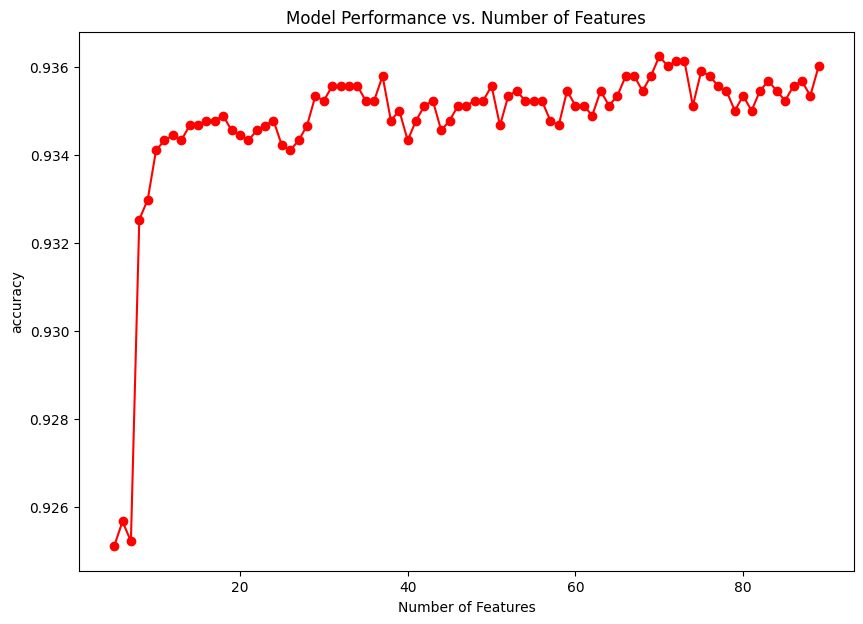

In [20]:
# Optimal no. of features

final_features = list(relieff_features) 

ml.plot_num_feature_performance(svm_classifier_test,  X, y, final_features, scoring='accuracy')


Maximum f1 = 0.7046 for 73 features


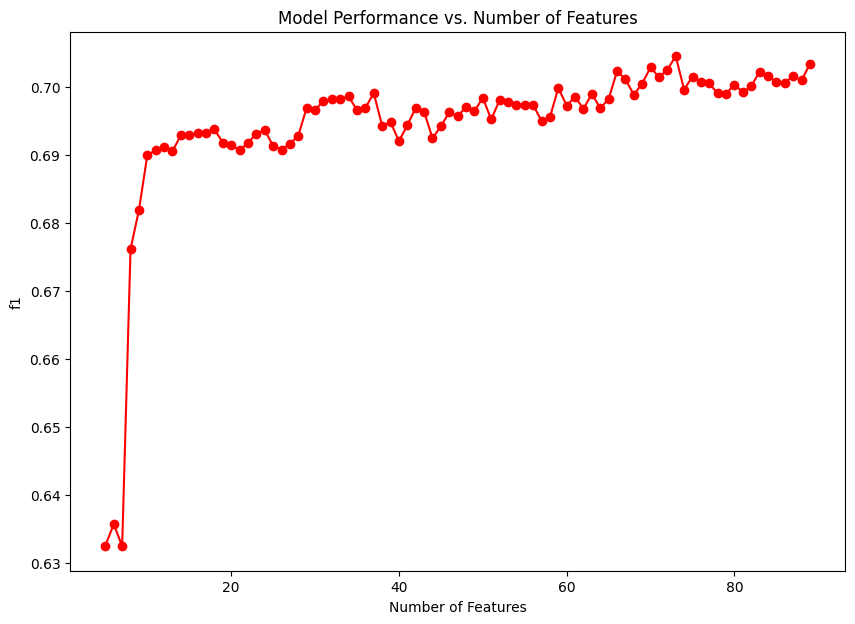

In [24]:
# Optimal no. of features

ml.plot_num_feature_performance(svm_classifier_test,  X, y, final_features, scoring='f1')


Maximum recall = 0.5824 for 73 features


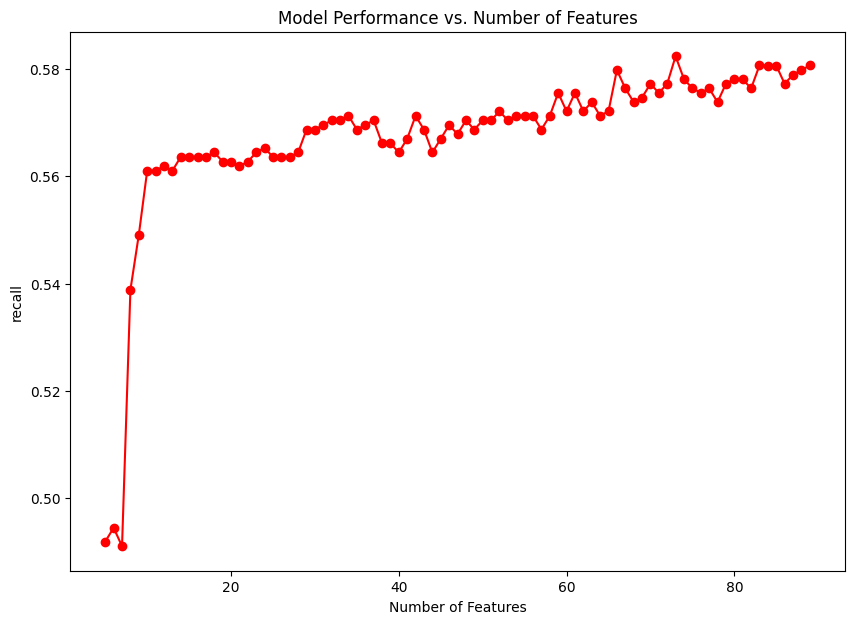

In [25]:
# Optimal no. of features

ml.plot_num_feature_performance(svm_classifier_test,  X, y, final_features, scoring='recall')

In [26]:
num_features = 73

selected = final_features[:num_features]
selected.append('Diabetes')

diabetes_df = diabetes_df[selected]

## Preprocessing

### Zero Imputation

In [27]:
# Imputing null values with zeroes

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                        impute = True, scale=True,
                                                        imputer=ml.SimpleImputer(strategy='constant',fill_value=0),
                                                        random_state=42)

In [28]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.926

Test Accuracy: 0.924

Precision: 0.873

Recall: 0.512

F1-Score: 0.646


### Mode Imputation

In [29]:
# Imputing with most frequent values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='most_frequent'),
                                                              random_state=42)

In [30]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.935

Test Accuracy: 0.934

Precision: 0.890

Recall: 0.585

F1-Score: 0.706


### k-NN Imputation

In [31]:
# Imputing missing values with values from the k-nearest neighbors in the feature space

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.KNNImputer(n_neighbors=20),
                                                              random_state=42)

In [32]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.931

Test Accuracy: 0.929

Precision: 0.872

Recall: 0.564

F1-Score: 0.685


### Multiple Imputation by Chained Equations (MICE)

In [33]:
# Imputes by looking at data from other columns and trying to estimate the best prediction for each missing value.

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.IterativeImputer(max_iter=20),
                                                              random_state=42)

In [34]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.928

Test Accuracy: 0.927

Precision: 0.884

Recall: 0.537

F1-Score: 0.668


### Median Imputation

In [35]:
# Imputing with median values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='median'),
                                                              random_state=42)

In [36]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.936

Test Accuracy: 0.935

Precision: 0.882

Recall: 0.601

F1-Score: 0.715


### Mean Imputation

In [37]:
# Splitting and Preprocessing data

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

In [38]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.937

Test Accuracy: 0.937

Precision: 0.896

Recall: 0.605

F1-Score: 0.723


### Dropping Null Values

In [39]:
# Drop null values
diabetes_df_na = diabetes_df.dropna()

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df_na, label = 'Diabetes',
                                                              impute = False, scale=True,
                                                              random_state=42)

In [40]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.914

Test Accuracy: 0.908

Precision: 0.954

Recall: 0.767

F1-Score: 0.850


## Oversampling and Undersampling

### Random Oversampling

In [41]:
X_ros, y_ros = ml.random_over_sample(X_train, y_train)

svm_classifier.fit(X_ros, y_ros)

ml.evaluate_model_metrics(svm_classifier,X_ros, y_ros,X_val, y_val)


Train Accuracy: 0.891

Test Accuracy: 0.889

Precision: 0.844

Recall: 0.828

F1-Score: 0.836


### SMOTE (Synthetic Minority Over-sampling Technique)

In [42]:
X_smote, y_smote = ml.smote_over_sample(X_train, y_train)

svm_classifier.fit(X_smote, y_smote)

ml.evaluate_model_metrics(svm_classifier,X_smote, y_smote,X_val, y_val)


Train Accuracy: 0.906

Test Accuracy: 0.895

Precision: 0.869

Recall: 0.816

F1-Score: 0.842


### Random Undersampling

In [43]:
X_rus, y_rus = ml.random_under_sample(X_train, y_train)

svm_classifier.fit(X_rus, y_rus)

ml.evaluate_model_metrics(svm_classifier,X_rus, y_rus,X_val, y_val)


Train Accuracy: 0.866

Test Accuracy: 0.870

Precision: 0.818

Recall: 0.798

F1-Score: 0.807


### Tomek Links

In [44]:
X_tomek, y_tomek = ml.tomek_links(X_train, y_train)

svm_classifier.fit(X_tomek, y_tomek)

ml.evaluate_model_metrics(svm_classifier,X_tomek, y_tomek,X_val, y_val)


Train Accuracy: 0.911

Test Accuracy: 0.904

Precision: 0.940

Recall: 0.767

F1-Score: 0.845


### SMOTE + Tomek Links

In [45]:
X_smote_tomek, y_smote_tomek = ml.smote_tomek(X_train, y_train)

svm_classifier.fit(X_smote_tomek, y_smote_tomek)

ml.evaluate_model_metrics(svm_classifier,X_smote_tomek, y_smote_tomek,X_val, y_val)


Train Accuracy: 0.904

Test Accuracy: 0.893

Precision: 0.864

Recall: 0.816

F1-Score: 0.839


In [46]:
# Model seems to perform better without oversampling or undersampling

## Hyperparameter Optimization 

### Grid Search

In [47]:
param_grid = {
    
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l1', 'l2'],
    'dual': [False], 
    'class_weight': [None, 'balanced'] 

}

In [48]:
grid_best_params, svm_classifier_grid = ml.grid_search_optimize(svm_classifier, param_grid, X_train, 
                                                                y_train, cv=10,scoring='accuracy')

In [49]:
grid_best_params

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'loss': 'squared_hinge',
 'penalty': 'l1'}

In [50]:
ml.evaluate_model_metrics(svm_classifier_grid,X_train,y_train,X_val,y_val)


Train Accuracy: 0.914

Test Accuracy: 0.906

Precision: 0.961

Recall: 0.755

F1-Score: 0.845


### Random Search

In [51]:
rand_best_params, svm_classifier_rand = ml.random_search_optimize(svm_classifier,param_grid,n_iter=100,cv=5,
                                                               X_train=X_train, y_train=y_train,
                                                               scoring='accuracy')

In [52]:
rand_best_params

{'penalty': 'l1',
 'loss': 'squared_hinge',
 'dual': False,
 'class_weight': None,
 'C': 10}

In [53]:
ml.evaluate_model_metrics(svm_classifier_rand,X_train,y_train,X_val,y_val)


Train Accuracy: 0.912

Test Accuracy: 0.904

Precision: 0.940

Recall: 0.767

F1-Score: 0.845


### Optuna

In [54]:
def objective(trial):

    C = trial.suggest_loguniform('C', 1e-5, 1e3)
    loss = trial.suggest_categorical('loss', ['hinge', 'squared_hinge'])
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
    dual = False
    
    if penalty == 'l1' or penalty == 'l2' and loss == 'hinge':
        raise ml.optuna.TrialPruned()

    model = LinearSVC(C=C, loss=loss, penalty=penalty, class_weight=class_weight, dual=dual, random_state=42)
            
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = ml.accuracy_score(y_test, y_pred)

    return accuracy

In [55]:
best_trial , svm_classifier_opt = ml.optuna_optimize(objective, LinearSVC, n_trials=150)

In [56]:
best_trial

{'C': 72.95630802194573,
 'loss': 'squared_hinge',
 'penalty': 'l2',
 'class_weight': None}

In [57]:
svm_classifier_opt.fit(X_train,y_train)

ml.evaluate_model_metrics(svm_classifier_opt,X_train,y_train,X_val,y_val)


Train Accuracy: 0.872

Test Accuracy: 0.854

Precision: 0.785

Recall: 0.785

F1-Score: 0.785


## Evaluation on Test Set


Train Accuracy: 0.904

Test Accuracy: 0.906

Precision: 0.905

Recall: 0.776

F1-Score: 0.835

Confusion Matrix:

[[319  12]
 [ 33 114]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       331
     Class 1       0.90      0.78      0.84       147

    accuracy                           0.91       478
   macro avg       0.91      0.87      0.88       478
weighted avg       0.91      0.91      0.90       478


ROC-AUC Curve:


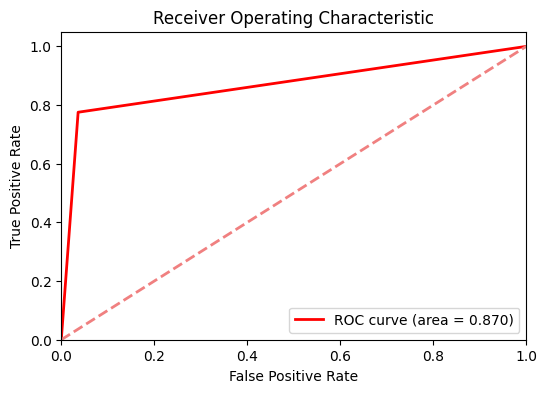

In [67]:
# After evaluating on the validation set, we evaluate and finalize on the test set

ml.evaluate_model_metrics(svm_classifier_grid, X_train, y_train, X_test, y_test, verbose=6)

## Cross Validation

### K-fold

In [58]:
ml.k_cross_validate(svm_classifier,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.88333333 0.93333333 0.90833333 0.88333333 0.86666667 0.9
 0.87394958 0.93277311 0.8907563  0.86554622]

Mean accuracy score:  0.8938025210084033

Standard deviation:  0.023427216752621337


In [59]:
ml.k_cross_validate(svm_classifier_grid,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.90833333 0.93333333 0.9        0.89166667 0.88333333 0.90833333
 0.88235294 0.92436975 0.8907563  0.8487395 ]

Mean accuracy score:  0.8971218487394959

Standard deviation:  0.022655624483386348


In [60]:
ml.k_cross_validate(svm_classifier_rand,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.86666667 0.93333333 0.90833333 0.88333333 0.875      0.90833333
 0.87394958 0.93277311 0.8907563  0.85714286]

Mean accuracy score:  0.8929621848739495

Standard deviation:  0.02538397563187668


In [61]:
ml.k_cross_validate(svm_classifier_opt,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.85833333 0.83333333 0.80833333 0.74166667 0.79166667 0.85
 0.87394958 0.88235294 0.82352941 0.82352941]

Mean accuracy score:  0.8286694677871148

Standard deviation:  0.03961563509185757


### Stratified K-fold

In [62]:
ml.stratified_k_cross_validate(svm_classifier,X,y,n_splits=10)


Average Accuracy: 0.8955042016806722

Average Precision: 0.8902226573696227

Average Recall: 0.7763157894736843

Average F1-Score: 0.828347286536353


In [63]:
ml.stratified_k_cross_validate(svm_classifier_grid,X,y,n_splits=10)


Average Accuracy: 0.8988305322128852

Average Precision: 0.9160852578131988

Average Recall: 0.7609986504723347

Average F1-Score: 0.8298526424626494


In [64]:
ml.stratified_k_cross_validate(svm_classifier_rand,X,y,n_splits=10)


Average Accuracy: 0.8946708683473389

Average Precision: 0.8875142881906652

Average Recall: 0.7763157894736843

Average F1-Score: 0.8272548646263391


In [65]:
ml.stratified_k_cross_validate(svm_classifier_opt,X,y,n_splits=10)


Average Accuracy: 0.8268977591036414

Average Precision: 0.7316627935937399

Average Recall: 0.7529689608636977

Average F1-Score: 0.7389446933892982


### Save Model

In [76]:
final_svm_estimator = svm_classifier_grid

In [77]:
# Saving the model

ml.save_model(final_svm_estimator, "../Models/Diabetes/SVM.pkl")

Overwrite File? [y/n]: y
Saved Model


## Prediction

In [73]:
# Predicting on perturbed values

ml.predict_on_modified_instance(final_svm_estimator, X_test.iloc[0], y_test.iloc[0], 0.4)

Instance:
 [ 0.03327166 -0.48576878 -0.11416641  0.85184756  0.12766791 -0.57417497
 -0.32457844 -1.0342994   0.74007503 -0.04245144 -0.13581759  0.29113305
 -0.21968732 -0.4320737  -0.74005003  0.15098147 -0.41453261  0.43165421
 -0.48261476  0.27725441 -1.20323658  0.58870806  0.71134842  0.4244998
  0.02840705 -0.52315528 -0.65741982  0.77053803 -1.00196643  1.97497651
  0.6877942   0.89942581  0.69888602  0.87053277  0.03754578 -0.98170337
  0.21075254  0.14109818 -0.92089803  0.90220379  0.18249826 -0.82585482
  0.19146201  1.28966887  0.25015178 -0.25187163 -0.37399371 -0.27689376
  1.75764423  0.05145611  0.55350706 -0.08124788 -1.89345104 -0.73186685
 -0.89453465 -0.32604832  0.66884347 -0.16406468 -0.34513819  0.14034887
  0.15005815 -0.08798924 -0.64294057 -0.28604548  1.84187676 -0.17292124
 -0.66666441 -0.3691085   0.20824099 -0.72836822  0.17127506  0.21999472
  1.09123124]

Expected Class:  0

 Modified Instance:
 [ 3.32716598e-02 -3.89771053e-01 -1.87319676e-01  6.427378

In [74]:
ml.predict_on_modified_instance(final_svm_estimator, X_test.iloc[1], y_test.iloc[1], 0.3)

Instance:
 [-0.65076505  0.64947295  4.11188739  1.38888541 -0.99881082 -0.91588045
 -1.14747947 -0.04624588 -0.46362551 -0.67711321 -0.85909458  0.76746144
 -0.75351003  0.5608649  -1.24658568  0.51919138 -0.93894141  0.26389335
  0.33980896  0.27725441 -1.36297747 -0.16272608  0.71134842  0.71028981
 -1.02733815 -0.2644194   2.03405994  0.62287646 -0.58232221 -0.23472276
  0.08805984 -0.20271186 -0.53269929 -0.96785618  0.26357605 -0.50736226
 -0.64805592 -0.6769946  -0.51027372  0.50130798  1.07606209  0.84862494
 -0.52693398 -1.14747388  0.44392883  0.05403496  0.01086957 -0.83528115
 -0.97581221 -0.63202503 -0.08853636 -1.10717678 -0.98696506 -0.65979635
 -1.11721331  0.21716431 -0.18532632  0.96649158 -0.19819893  0.14034887
  0.17430028 -0.02429587  0.13251753  0.21251328 -0.24334905 -0.17292124
 -1.12612518  0.31114803 -0.43236406 -1.01364784 -0.29789101 -0.47404649
  1.62149649]

Expected Class:  1

 Modified Instance:
 [-0.65076505  0.64093905  4.12845751  1.21755436 -1.16650